In [1]:
# Standard IMPORT

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('US_Accidents_Dec20.csv')

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

## 1. Dropping some unuseful columns

In [5]:
# drop the feature which includes too much missing values 
df = df.drop(['Precipitation(in)','Wind_Chill(F)','End_Lat','End_Lng','Number','Wind_Chill(F)'], axis=1)

In [6]:
# drop the feature which cannot give much useful information
df = df.drop(['ID','Source','End_Time','Zipcode','Country','Airport_Code','Weather_Timestamp','Wind_Direction'], axis=1)

## 2. Converting bool and binary to dummy

In [7]:
bool_variable = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout',
                'Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']
df[bool_variable] = df[bool_variable].astype(int)

In [8]:
binary_variable = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
df[binary_variable] = pd.get_dummies(df[binary_variable],drop_first = True)

In [9]:
df['Timezone'] = pd.get_dummies(df['Timezone'],drop_first = True)
df['Side'] = pd.get_dummies(df['Side'],drop_first = True)

## 3.Handling missing values

In [10]:
df.select_dtypes(include=['object'])

,Start_Time,Description,Street,City,County,State,Weather_Condition
0,2016-02-08 05:46:00,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,Light Rain
1,2016-02-08 06:07:59,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,Light Rain
2,2016-02-08 06:49:27,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,Overcast
3,2016-02-08 07:23:34,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,Mostly Cloudy
4,2016-02-08 07:39:07,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,Mostly Cloudy
...,...,...,...,...,...,...,...
4232536,2019-08-23 18:03:25,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,Fair
4232537,2019-08-23 19:11:30,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,Fair
4232538,2019-08-23 19:00:21,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,Partly Cloudy
4232539,2019-08-23 19:00:21,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,Fair


In [11]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], infer_datetime_format=True)
df['Start_Time_month']= df['Start_Time'].dt.month
df['Start_Time_day']= df['Start_Time'].dt.day
df['Start_Time_day_hour']= df['Start_Time'].dt.hour
df = df.drop('Start_Time', axis=1)

In [12]:
df.isnull().sum()

TMC                      1516064
Severity                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    2
Street                         0
Side                           0
City                         137
County                         0
State                          0
Timezone                       0
Temperature(F)             89900
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Speed(mph)           479326
Weather_Condition          98383
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Lo

In [13]:
df = df.dropna(subset = ['Description'])

In [14]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
svd = TruncatedSVD(n_components=50)
kmeans = KMeans(n_clusters=6)
pipeline = make_pipeline(svd, kmeans)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features= 1000000)
tfidf = tfidf_vectorizer.fit_transform(df.Description)

In [16]:
pipeline.fit(tfidf)
labels = pipeline.predict(tfidf)
df['labels'] = labels
df = df.drop(['Description'], axis=1)

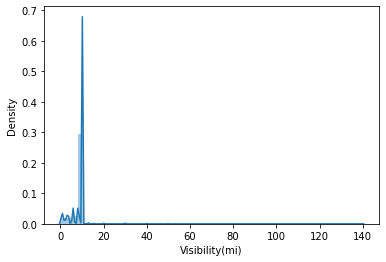

In [17]:
# median
sns.distplot(df[df['Visibility(mi)'].notnull()]['Visibility(mi)'])

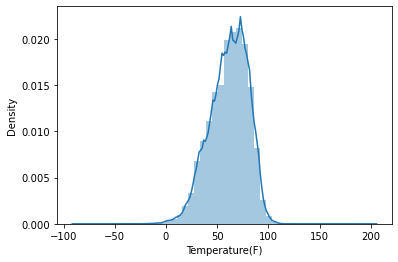

In [18]:
# mean
sns.distplot(df[df['Temperature(F)'].notnull()]['Temperature(F)'])

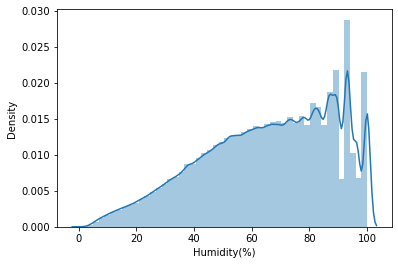

In [19]:
# median
sns.distplot(df[df['Humidity(%)'].notnull()]['Humidity(%)'])

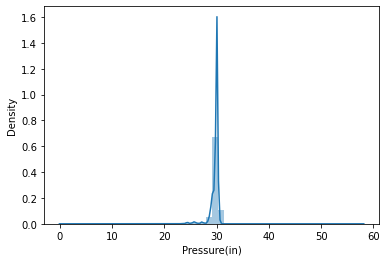

In [20]:
# mean
sns.distplot(df[df['Pressure(in)'].notnull()]['Pressure(in)'])

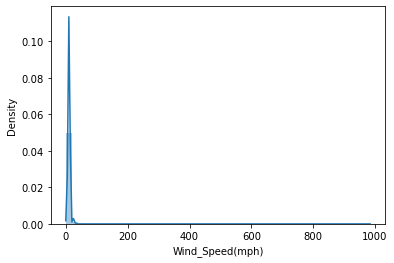

In [21]:
# median
sns.distplot(df[df['Wind_Speed(mph)'].notnull()]['Wind_Speed(mph)'])

In [22]:
# df['Weather_Condition'].value_counts()
df = df.dropna(subset = ['Weather_Condition'])

In [23]:
# mode
# df.City.value_counts()
df[['City']] = df[['City']].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [24]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
continuous_variable = ['Visibility(mi)','Humidity(%)','Wind_Speed(mph)']
df[continuous_variable] = imputer.fit_transform(df[continuous_variable].values)

In [25]:
imputer2 = SimpleImputer(missing_values=np.nan, strategy='median')
continuous_variable_2 = ['Temperature(F)','Pressure(in)']
df[continuous_variable_2] = imputer.fit_transform(df[continuous_variable_2].values)

## 4. Converting categorical 

In [26]:
df.select_dtypes(include=['object'])

,Street,City,County,State,Weather_Condition
0,I-70 E,Dayton,Montgomery,OH,Light Rain
1,Brice Rd,Reynoldsburg,Franklin,OH,Light Rain
2,State Route 32,Williamsburg,Clermont,OH,Overcast
3,I-75 S,Dayton,Montgomery,OH,Mostly Cloudy
4,Miamisburg Centerville Rd,Dayton,Montgomery,OH,Mostly Cloudy
...,...,...,...,...,...
4232536,Pomona Fwy E,Riverside,Riverside,CA,Fair
4232537,I-8 W,San Diego,San Diego,CA,Fair
4232538,Garden Grove Fwy,Orange,Orange,CA,Partly Cloudy
4232539,San Diego Fwy S,Culver City,Los Angeles,CA,Fair


In [27]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df[["City","County","State","Weather_Condition"]] = ord_enc.fit_transform(df[["City","County","State","Weather_Condition"]])